# Titanic data analysys
It is my first Jupyter Notebook, first project-alike thing that will make me understand the medium better.
## Project
### Setup

In [1]:
# importing the libraries
import pandas as pd
import numpy as np

data = pd.read_csv("../data/titanic_train.csv") # getting data

### Getting to know the data, first 5 rows, information

In [2]:
data.head() # First 5 rows

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
data.info() # Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [4]:
data.isnull().sum() # making sure there is no empty values by counting

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
survived       0
dtype: int64

### Optional graphic representaion of data

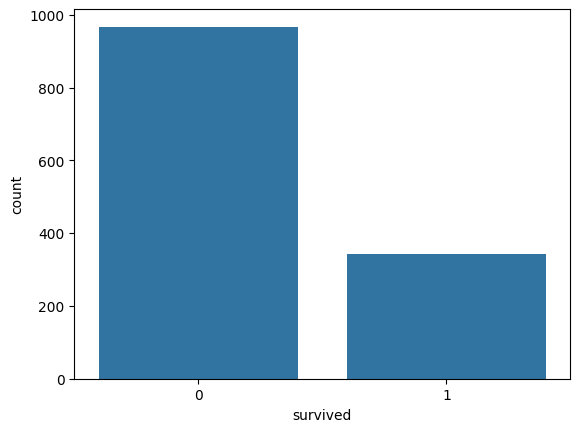

In [5]:
# Setup
import matplotlib.pyplot as plt # charts
import seaborn as sns # making charts prettier
%matplotlib inline

# Chart
sns.countplot(x='survived', data=data)
plt.show()

#### Trying

In [6]:
# data['Age'].isnull().sum()
# data['Sex'].unique()
# data['Sex'].value_counts()

### Features prepared and data segmented (bagging)

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'sibsp', 'Parch', 'Fare']

X = data[features]
y = data['survived']
# X.head()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, X.shape

((1047, 6), (262, 6), (1309, 6))

### Random Forest model

In [9]:
# setup
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [10]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# accuracy
print("Accuracy: ", accuracy)

Accuracy:  0.6984732824427481


### Importance

In [ ]:
importances = model.feature_importances_

feature_importance = pd.DataFrame({ # DataFrame pandas basic for showing data (table-like)
    'feature': features,
    'importance': importances
    })

feature_importance = feature_importance.sort_values(by='importance', ascending=False) # Sorting by importances

feature_importance #print

,feature,importance
5,Fare,0.366119
2,Age,0.329476
1,Sex,0.147472
0,Pclass,0.060647
3,sibsp,0.052308
4,Parch,0.043977


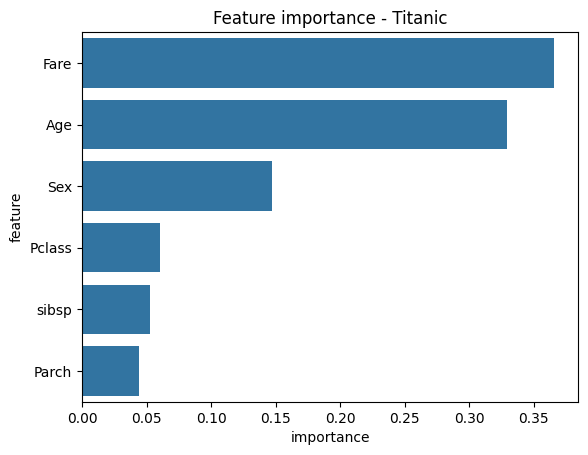

In [19]:
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importance
)
plt.title('Feature importance - Titanic')
plt.show()

## One-person prediction
Here I am creating a person (only given features) and making analysys whether they'll survive.
#### Person: (actually two, because it was fun)

In [40]:
one_person = pd.DataFrame([{
    'Pclass' : 2,
    'Sex' : 0,
    'Age' : 25,
    'sibsp' : 0,
    'Parch' : 3,
    'Fare' : 32
}])
second_person = pd.DataFrame([{
    'Pclass' : 2,
    'Sex' : 0,
    'Age' : 27,
    'sibsp' : 1,
    'Parch' : 0,
    'Fare' : 25
}])

#### Prediction and possibility of survival

In [ ]:
prediction = 'survive.' if model.predict(one_person) else 'die.' # if [1] person survive, else die
probability = model.predict_proba(one_person)
print("One person will", prediction, "Chances are: ", probability, "(survive die).")

prediction2 = 'survive.' if model.predict(second_person) else 'die.'
probability2 = model.predict_proba(second_person)
print("One person will", prediction2, "Chances are: ", probability2, "(survive die).")


One person will die. Chances are:  [[0.92 0.08]] (survive die).
One person will die. Chances are:  [[0.98 0.02]] (survive die).
